In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
df_aerofit = pd.read_csv('/content/Aerofit_treadmill.csv')

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df_aerofit['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

## Gender vs Income

[]

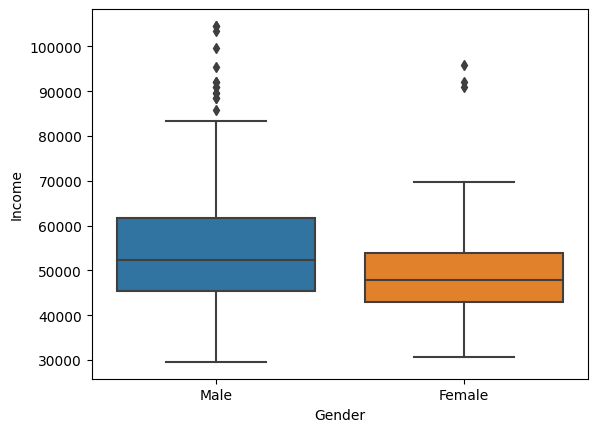

In [ ]:
sns.boxplot(x="Gender", y='Income', data=df_aerofit)
plt.plot()

Q. is difference between Income across Income statistically significant or just by chance.


In [ ]:
income_male = df_aerofit[df_aerofit['Gender']=='Male']['Income']
income_female = df_aerofit[df_aerofit['Gender']=='Female']['Income']

In [ ]:
income_male.head()

0    29562
1    31836
3    32973
4    35247
7    32973
Name: Income, dtype: int64

In [ ]:
income_female.head()

2     30699
5     32973
6     35247
9     37521
11    35247
Name: Income, dtype: int64

In [ ]:
income_male.mean()

56562.75961538462

In [ ]:
income_female.mean()

49828.90789473684

In [ ]:
# H0: Gender and income are unrelated(mu1 = mu2)
ttest_ind(income_male, income_female)

Ttest_indResult(statistic=2.752488637540257, pvalue=0.006527263097214258)

In [ ]:
# What if we don't have data , just have mean and std dev
from scipy.stats import ttest_ind_from_stats

In [ ]:
print(income_male.mean(), income_male.std(), len(income_male))
print(income_female.mean(), income_female.std(), len(income_female))

56562.75961538462 18421.68777910902 104
49828.90789473684 12557.690427970298 76


In [ ]:
ttest_ind_from_stats(
    income_male.mean(), income_male.std(), len(income_male),
    income_female.mean(), income_female.std(), len(income_female)
)

Ttest_indResult(statistic=2.752488637540257, pvalue=0.006527263097214258)

p-value is less than 0.05, so reject H0

## Product vs Income

In [ ]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='Product', ylabel='Income'>

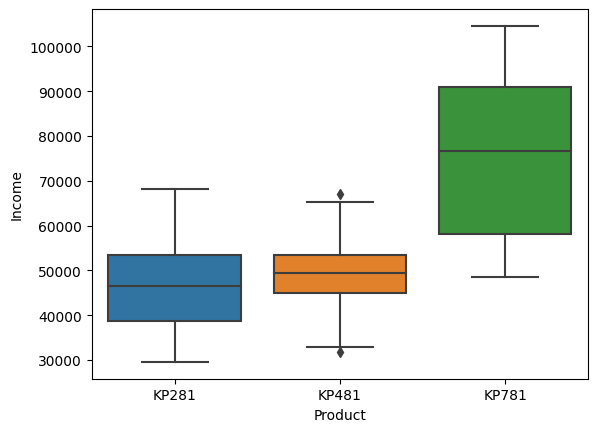

In [ ]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

**Q.** is there a relation between product and income? Or are they independent

In [ ]:
from scipy.stats import f_oneway

In [ ]:
income_kp281 = df_aerofit[df_aerofit['Product']=='KP281']['Income']
income_kp481 = df_aerofit[df_aerofit['Product']=='KP481']['Income']
income_kp781 = df_aerofit[df_aerofit['Product']=='KP781']['Income']

In [ ]:
# H0: All three have same mean
# Ha: Atleast one is different from others
f_stat, p_value = f_oneway(income_kp281, income_kp481, income_kp781)
print(f_stat, p_value)

89.25903546601671 1.5644991316342494e-27


In [ ]:
f_stat, p_value = f_oneway(income_kp281, income_kp481)
print(f_stat, p_value)

2.8283463437143213 0.09487529747264983


In [ ]:
t_stat, p_value = ttest_ind(income_kp281, income_kp481)
print(t_stat, p_value)

-1.6817688139914835 0.09487529747264932


In [ ]:
f_stat, p_value = f_oneway(income_kp481, income_kp781)
print(f_stat, p_value)

92.69856635642788 7.770191623361243e-16


In [ ]:
t_stat, p_value = ttest_ind(income_kp481, income_kp781)
print(t_stat, p_value)

-9.628009470104809 7.770191623361236e-16


## Product vs Gender (ChiSquare)

In [ ]:
gender_product = pd.crosstab(index=df_aerofit['Gender'], columns=df_aerofit['Product'])

In [ ]:
gender_product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [ ]:
# H0: Gender does not effect product
# Ha: Gender effects product

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi_stat, p_value, df, exp_freq = chi2_contingency(gender_product)

In [ ]:
print(chi_stat, p_value, df, exp_freq )

12.923836032388664 0.0015617972833158714 2 [[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]


In [ ]:
print(p_value)
if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")  

0.0015617972833158714
Reject H0
